# Feature selection - Práctica

Al extraer de forma inteligente las features más importantes de nuestros datos e ignorar el ruido, los algoritmos de selección de variables logran dos resultados principales:

- Reducción del tiempo de entrenamiento y predicción: al disponer de menos datos, esto generalmente da como resultado un mejor ajuste del modelo y tiempos de predicción, lo que hace que los entrenamientos o transformaciones sean más rápidas en general.

- Mejor rendimiento del modelo: al eliminar los datos redundantes, es menos probable que tomemos decisiones basadas en datos ruidosos e irrelevantes, y también permite que nuestros modelos se centren en las características importantes, mejorando así el rendimiento predictivo del pipeline del modelo.

Para obtener una comprensión más realista de cómo y por qué los datos ruidosos se interponen en nuestro camino, vamos a trabajar con un conjunto de datos de fraude en tarjetas de crédito. EL objetivo que perseguían estos datos era el de investigar los incumplimiento de pago de los clientes en Taiwán.

Trabajaremos con 23 variables y el target. El target es booleana. La razón por la que estamos trabajando con 23 features es que queremos ver si podemos encontrar cuáles de las 23 variables nos ayudarán en nuestro aprendizaje y cuáles nos perjudicarán.

Puedes encontrar el fichero con los datos en la carpeta `data` o en http://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

Encontrarás en la página web más información que te ayudará a entender los datos de los que disponemos con mayor profundidad. 

### 1. Carga los datos
Importa las librerías necesarias y realiza una carga de los datos (*default_of_credit_card_clients.xls*)

Fija una semilla en 123 para asegurarnos obtener los mismos números aleatorios y poder comparar.

In [1]:
# code



Sigue adelante con un pequeño EDA.

In [2]:
# code


(30000, 24)

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0


LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

In [7]:
# vamos a escalar los datos


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,0.010101,1.0,0.333333,0.333333,0.051724,0.4,0.4,0.1,0.1,0.0,...,0.160138,0.080648,0.260979,0.000000,0.000409,0.000000,0.000000,0.000000,0.000000,1.0
1,0.111111,1.0,0.333333,0.666667,0.086207,0.1,0.4,0.2,0.2,0.2,...,0.163220,0.084074,0.263485,0.000000,0.000594,0.001116,0.001610,0.000000,0.003783,1.0
2,0.080808,1.0,0.333333,0.666667,0.224138,0.2,0.2,0.2,0.2,0.2,...,0.173637,0.095470,0.272928,0.001738,0.000891,0.001116,0.001610,0.002345,0.009458,0.0
3,0.040404,1.0,0.333333,0.333333,0.275862,0.2,0.2,0.2,0.2,0.2,...,0.186809,0.109363,0.283685,0.002290,0.001199,0.001339,0.001771,0.002506,0.001892,0.0
4,0.040404,0.0,0.333333,0.333333,0.620690,0.1,0.2,0.1,0.2,0.2,...,0.179863,0.099633,0.275681,0.002290,0.021779,0.011160,0.014493,0.001615,0.001284,0.0


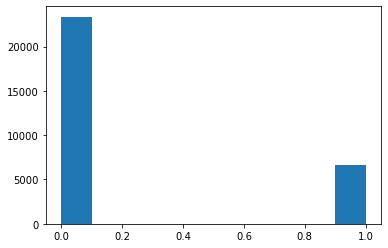

Obtén la X y la Y, así como tu set de train y test. Deja para el test un 20% de los datos.

In [13]:
# code


X antes de SMOTE: (30000, 23)
X después de SMOTE: (46728, 23)

Balance de las clases fraude vs no fraude (%):

Vemos que SMOTE nos añade la diferencia que teníamos entre nuestras clases
 16728


A continuación, realiza el preprocesado que consideres necesario. Puedes empezar a buscar las métricas de las que te vas a ayudar para preparar tu clasificador. 

In [15]:
#code 


Clases en train:
 0.0    50.024076
1.0    49.975924
Name: default payment next month, dtype: float64
Clases en test:
 1.0    50.096298
0.0    49.903702
Name: default payment next month, dtype: float64


Encuentra el mejor modelo para nuestro problema y después trabajaremos para mejorar ese modelo con la selección de variables. Realiza una comparación con los cuatro propuestos y después haremos la misma prueba habiendo aplicado las diversas técnicas que hemos visto de feature selection. Puedes empezar a buscar las métricas de las que te vas a ayudar para preparar tu clasificador.

- Regresión logística
- KNN
- Árbol de decisión
- Random forest

In [18]:
# code


Average time to fit (s): 0.301
Average time to score (s): 0.007


0.6933447464155789

              precision    recall  f1-score   support

         0.0       0.65      0.85      0.74      4664
         1.0       0.79      0.53      0.64      4682

    accuracy                           0.69      9346
   macro avg       0.72      0.69      0.69      9346
weighted avg       0.72      0.69      0.69      9346



In [28]:
# observamos la curva roc y el área bajo la curva



Decision Tree AuC for imbalanced dataset: 0.6936547802137011


C:\Users\Admin\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix, without normalization
[[3986  678]
 [2188 2494]]
Normalized confusion matrix
[[0.85463122 0.14536878]
 [0.46732166 0.53267834]]


C:\Users\Admin\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


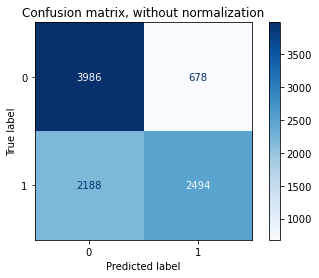

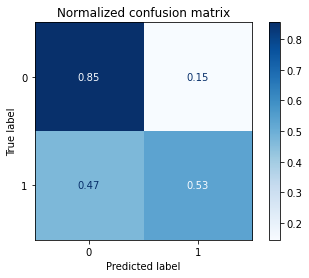

### Haz uso de la correlación de Pearson para seleccionar variables:

En este caso, vamos a probar a quedarnos con las 5 variables que más correlan con nuestro target y veremos si nos ayudan a explicar nuestra variable objetivo o no.

In [30]:
# code



,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
45038,0.104337,1.0,0.394511,0.666667,0.277607,0.336707,0.4,0.2,0.2,0.4,...,0.211484,0.128814,0.295384,0.000000,0.001406,0.005217,0.000000,0.003768,0.002677,1.0
14976,0.020202,1.0,0.500000,0.333333,0.637931,0.400000,0.4,0.4,0.4,0.4,...,0.185720,0.109641,0.283873,0.002061,0.000594,0.000000,0.004055,0.002778,0.002270,1.0
14304,0.050505,0.0,0.333333,0.333333,0.344828,0.200000,0.2,0.2,0.2,0.2,...,0.176096,0.093885,0.272372,0.005724,0.002809,0.002232,0.016103,0.007034,0.009458,0.0
35234,0.147358,0.0,0.333333,0.333333,0.271302,0.400000,0.4,0.2,0.2,0.2,...,0.248681,0.182455,0.340268,0.000000,0.002550,0.005580,0.017263,0.009723,0.010793,1.0
25941,0.202020,1.0,0.333333,0.333333,0.224138,0.100000,0.1,0.1,0.2,0.2,...,0.191170,0.110414,0.284538,0.001557,0.018877,0.002168,0.001319,0.001789,0.004313,0.0


<AxesSubplot:>

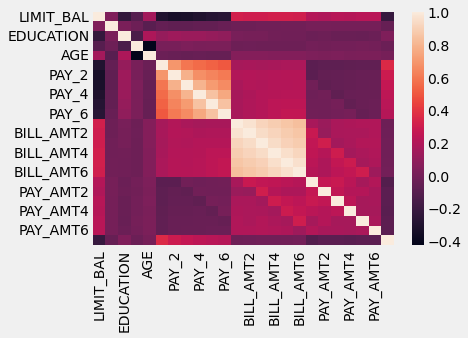

In [32]:
# correlaciones entre el target y el resto de variables


default payment next month    1.000000
PAY_0                         0.356718
PAY_2                         0.288270
PAY_3                         0.259544
PAY_4                         0.236164
PAY_5                         0.221866
PAY_6                         0.208035
EDUCATION                     0.035059
AGE                           0.005192
BILL_AMT6                    -0.008092
BILL_AMT5                    -0.012688
BILL_AMT4                    -0.015648
BILL_AMT3                    -0.020189
BILL_AMT2                    -0.021963
BILL_AMT1                    -0.029854
MARRIAGE                     -0.031991
SEX                          -0.048947
PAY_AMT5                     -0.085103
PAY_AMT6                     -0.090067
PAY_AMT3                     -0.091230
PAY_AMT2                     -0.092535
PAY_AMT4                     -0.094030
PAY_AMT1                     -0.115964
LIMIT_BAL                    -0.217685
Name: default payment next month, dtype: float64

In [35]:
highly_correlated_features

Index(['LIMIT_BAL', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
       'default payment next month'],
      dtype='object')

In [37]:
# incluimos solo las variables más correladas


Average time to fit (s): 0.061
Average time to score (s): 0.006


C:\Users\Admin\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix, without normalization
[[15989  2711]
 [ 8620 10062]]
Normalized confusion matrix
[[0.85502674 0.14497326]
 [0.4614067  0.5385933 ]]


C:\Users\Admin\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


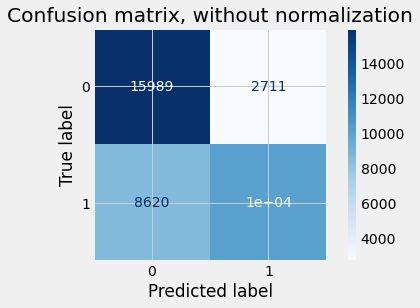

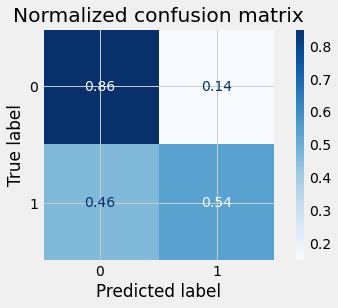

### A continuación, filtra el dataset fijándote en aquellas features que nos ayuden a mantener más varianza. Haz uso de SkLearn. ¿Qué diferencias observas?

In [40]:
# code


(37382, 1)

Average time to fit (s): 0.016
Average time to score (s): 0.005


C:\Users\Admin\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix, without normalization
[[11515  7185]
 [10605  8077]]
Normalized confusion matrix
[[0.6157754  0.3842246 ]
 [0.56765871 0.43234129]]


C:\Users\Admin\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


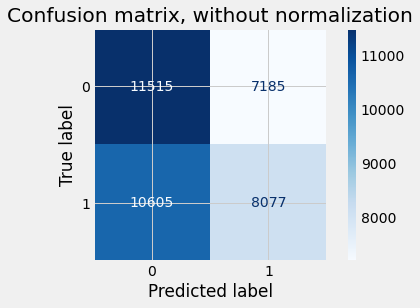

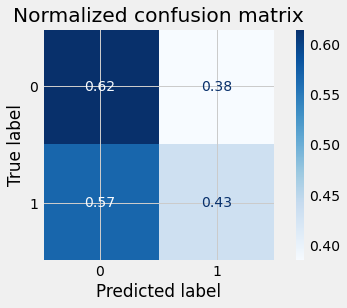

### Prueba en este caso con SelectKBest. ¿Hay diferencias significativas? 

In [43]:
# code


(37382, 5)


Average time to fit (s): 0.045
Average time to score (s): 0.01


C:\Users\Admin\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix, without normalization
[[14783  3917]
 [ 7177 11505]]
Normalized confusion matrix
[[0.79053476 0.20946524]
 [0.38416658 0.61583342]]


C:\Users\Admin\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


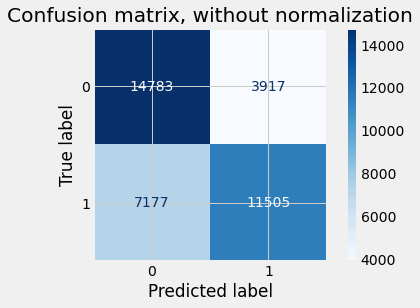

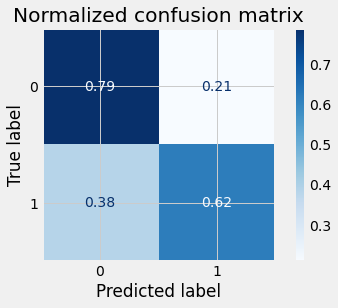